In [209]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind, norm
from statsmodels.stats.weightstats import ztest

In [573]:
def zscore(g1, g2, std):
    sample_std = std / np.sqrt(len(g1))
    
    z = (g1.mean() - g2.mean()) / (sample_std * np.sqrt(2))
    
    return z

def tscore(g1, g2, std):
    sample_std = std / np.sqrt(len(g1))
    
    z = (g1.mean() - g2.mean()) / (sample_std * np.sqrt(2))
    
    return z

In [606]:
size = 5
std = 2

g1 = np.random.normal(loc=8, scale=std, size=size)
g2 = np.random.normal(loc=9, scale=std, size=size)

pooled = np.concatenate([g1, g2])

In [607]:
ttest_ind(g1, g2)

Ttest_indResult(statistic=-1.848541373619814, pvalue=0.1017040440849459)

In [608]:
ztest(g1, g2)

(-1.8485413736198142, 0.06452406487588203)

In [610]:
diffs = []
zs = []
z = zscore(g1, g2, std)

total = 0
larger_z = 0

for s in range(50000):
    sample_g1 = np.random.choice(pooled, replace=True, size=size)
    sample_g2 = np.random.choice(pooled, replace=True, size=size)
    
    sample_z = zscore(sample_g1, sample_g2, std)
    zs.append(sample_z)
    if abs(sample_z) > abs(z):
        larger_z += 1
    total += 1
    
percent_larger = float(larger_z)/total
percent_larger

0.0852

((array([-4.19138481, -3.98563638, -3.8734641 , ...,  3.8734641 ,
          3.98563638,  4.19138481]),
  array([-4.43421229, -4.38388644, -4.11848929, ...,  4.36811603,
          4.61122509,  4.64311021])),
 (1.0887304723640332, -0.0010307383514443188, 0.9999778311993617))

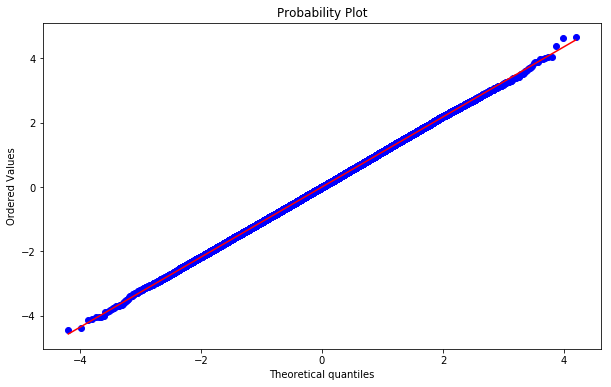

In [597]:
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(zs, dist="norm", plot=plt.subplots(figsize=(10, 6))[1])

((array([-4.19138481, -3.98563638, -3.8734641 , ...,  3.8734641 ,
          3.98563638,  4.19138481]),
  array([-2.45266423, -2.44174562, -2.37464286, ...,  2.42571725,
          2.42887784,  2.76202238])),
 (0.5429523947214249, 0.002562920085755121, 0.9996236528626525))

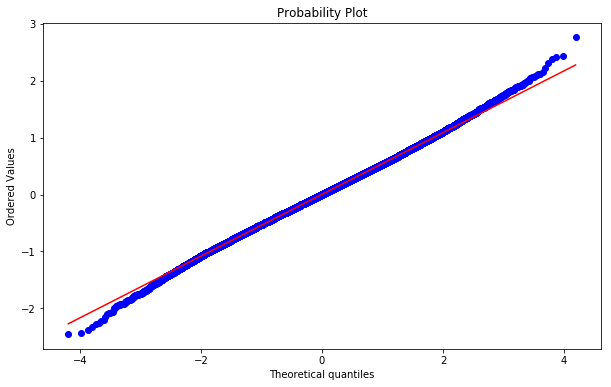

In [531]:
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(z2s, dist="norm", plot=plt.subplots(figsize=(10, 6))[1])

In [ ]:
f.

In [235]:
sample_sizes = [1, 5, 10, 20, 50, 100, 300]
size = 15
std = 10

dat = {sample_size: [np.random.normal(loc=75, scale=std, size=sample_size).mean()
          for _ in range(1000)]
       for sample_size in sample_sizes}

(70, 80)

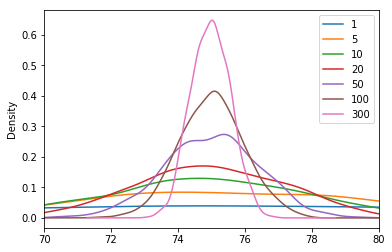

In [236]:
for s in sample_sizes:
    pd.Series(dat[s]).plot(kind='kde', label=s, legend=True)
    
plt.gca().set_xlim(70, 80)

In [237]:
help(ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1, x2 : array_like, 1-D or 2-D
        two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : string
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means larger than value
           'smaller' :  H1: difference in means smaller than value
 